# AirBNB Study: Data Cleaning and *EDA*

This is a dataset of ~78000 AirBNB profiles I downloaded from Kaggle to practice building neural network models. Each rows contains information on the hosts profile, rental amenities, location, and reviews, which is considerably more than any other AirBNB dataset I could find and why I chose it to study.

## Import and Clean the Dataframe



*   Import libraries
*   Clean the dataframe



In [1]:
# Import libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter
import re
from sklearn.feature_extraction.text import CountVectorizer

# Hide warnings
import warnings
warnings.filterwarnings("ignore")

# Import Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Airbnb_Data.csv')

In [3]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [4]:
df.shape

(74111, 29)

In [5]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [6]:
df['neighbourhood'] = df['neighbourhood'].str.replace("'", "")

In [7]:
# Convert the log price to linear
df['linear_price'] = np.exp(df['log_price'])

# Assuming df is your DataFrame and column_name is the name of the column you want to normalize
column_name = 'linear_price'

# Calculate the minimum and maximum values of the column
min_val = df[column_name].min()
max_val = df[column_name].max()

# Apply Min-Max normalization to the column
df[column_name] = (df[column_name] - min_val) / (max_val - min_val)


In [8]:
df.drop(columns=['id', 'thumbnail_url', 'log_price'], inplace=True)

In [9]:
df.head()

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,linear_price
0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0,0.074575
1,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hells Kitchen,6,93.0,10019,3.0,3.0,0.084084
2,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,10027,1.0,3.0,0.072072
3,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,94117.0,2.0,2.0,0.374875
4,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,20009,0.0,1.0,0.057057


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_type           74111 non-null  object 
 1   room_type               74111 non-null  object 
 2   amenities               74111 non-null  object 
 3   accommodates            74111 non-null  int64  
 4   bathrooms               73911 non-null  float64
 5   bed_type                74111 non-null  object 
 6   cancellation_policy     74111 non-null  object 
 7   cleaning_fee            74111 non-null  bool   
 8   city                    74111 non-null  object 
 9   description             74111 non-null  object 
 10  first_review            58247 non-null  object 
 11  host_has_profile_pic    73923 non-null  object 
 12  host_identity_verified  73923 non-null  object 
 13  host_response_rate      55812 non-null  object 
 14  host_since              73923 non-null

In [11]:
# Clean up the formatting and print the general stats
statistics = df.describe()
statistics_formatted = statistics.applymap(lambda x: "{:.2f}".format(x))
print(statistics_formatted)

      accommodates bathrooms  latitude longitude number_of_reviews  \
count     74111.00  73911.00  74111.00  74111.00          74111.00   
mean          3.16      1.24     38.45    -92.40             20.90   
std           2.15      0.58      3.08     21.71             37.83   
min           1.00      0.00     33.34   -122.51              0.00   
25%           2.00      1.00     34.13   -118.34              1.00   
50%           2.00      1.00     40.66    -77.00              6.00   
75%           4.00      1.00     40.75    -73.95             23.00   
max          16.00      8.00     42.39    -70.99            605.00   

      review_scores_rating  bedrooms      beds linear_price  
count             57389.00  74020.00  73980.00     74111.00  
mean                 94.07      1.27      1.71         0.08  
std                   7.84      0.85      1.25         0.08  
min                  20.00      0.00      0.00         0.00  
25%                  92.00      1.00      1.00         0.04

#Summary Statistics


For my EDA, I'm just doing some basic visualizations and breaking down the amenities list into individual variables. In this next part I'll be examining the variable distribution.



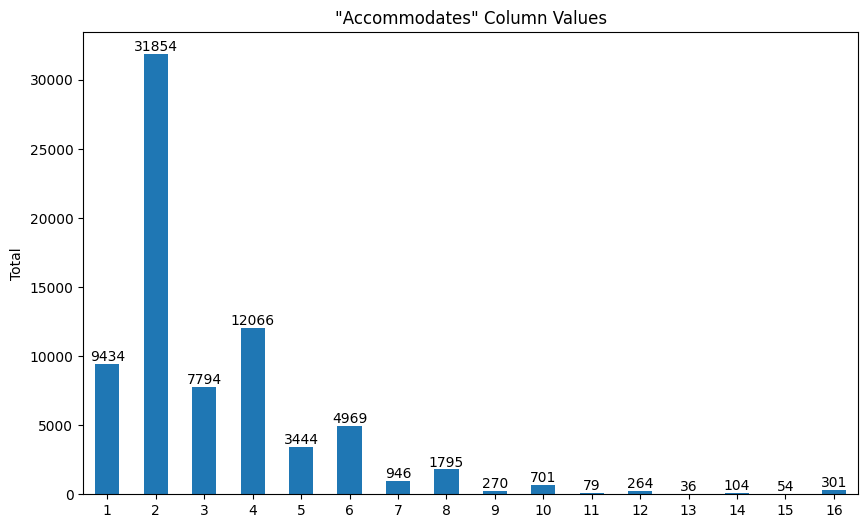

In [12]:
# Get the values
value_counts = df['accommodates'].value_counts()

# Sort the values
value_counts_sorted = value_counts.sort_index()

# Plot the graph
plt.figure(figsize=(10, 6))
bars = value_counts_sorted.plot(kind='bar')

plt.xticks(rotation='horizontal')
plt.xlabel('')
plt.ylabel('Total')
plt.title('"Accommodates" Column Values')

# Add the total count to the top of each column for readability
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{int(bar.get_height())}',
             ha='center', va='bottom')

# Print the graph
plt.show()


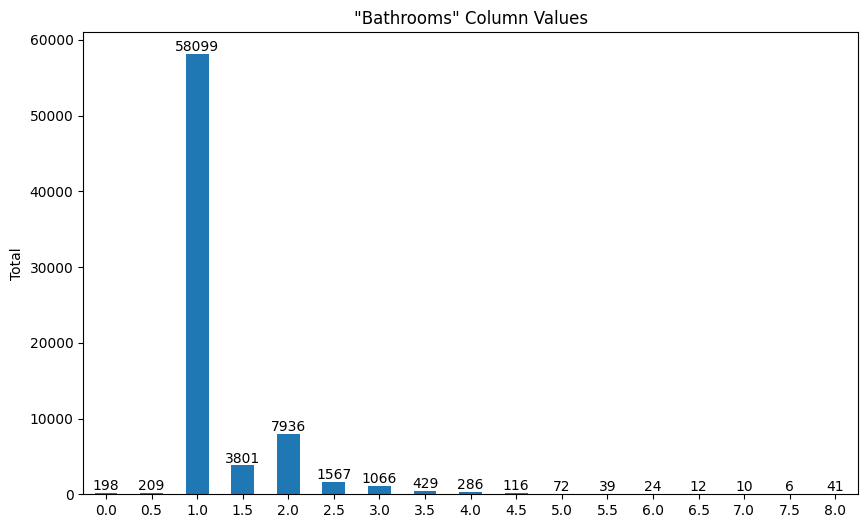

In [13]:
# Get the values
value_counts = df['bathrooms'].value_counts()

# Sort the values
value_counts_sorted = value_counts.sort_index()

# Plot the graph
plt.figure(figsize=(10, 6))
bars = value_counts_sorted.plot(kind='bar')

plt.xticks(rotation='horizontal')
plt.xlabel('')
plt.ylabel('Total')
plt.title('"Bathrooms" Column Values')

# Add the total count to the top of each column for readability
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{int(bar.get_height())}',
             ha='center', va='bottom')

# Print the graph
plt.show()



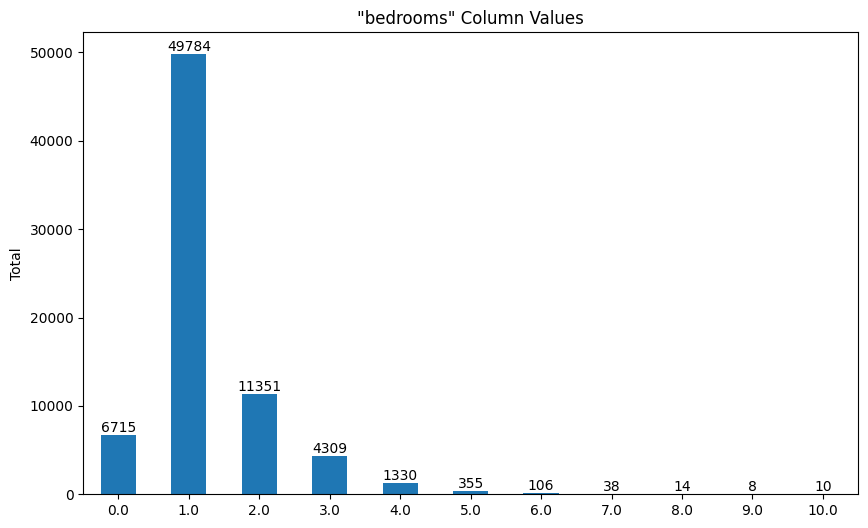

In [14]:
# Get the values
value_counts = df['bedrooms'].value_counts()

# Sort the values
value_counts_sorted = value_counts.sort_index()

# Plot the graph
plt.figure(figsize=(10, 6))
bars = value_counts_sorted.plot(kind='bar')

plt.xticks(rotation='horizontal')
plt.xlabel('')
plt.ylabel('Total')
plt.title('"bedrooms" Column Values')

# Add the total count to the top of each column for readability
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{int(bar.get_height())}',
             ha='center', va='bottom')

# Print the graph
plt.show()


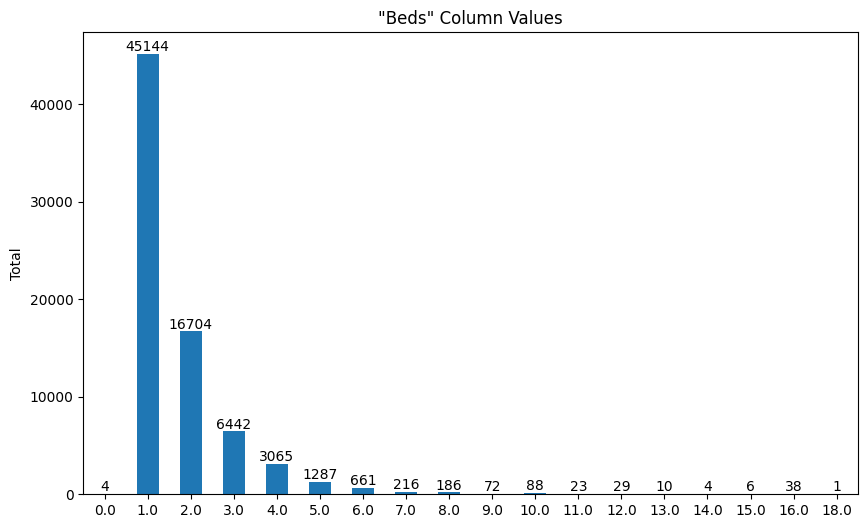

In [15]:
# Get the values
value_counts = df['beds'].value_counts()

# Sort the values
value_counts_sorted = value_counts.sort_index()

# Plot the graph
plt.figure(figsize=(10, 6))
bars = value_counts_sorted.plot(kind='bar')

plt.xticks(rotation='horizontal')
plt.xlabel('')
plt.ylabel('Total')
plt.title('"Beds" Column Values')

# Add the total count to the top of each column for readability
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{int(bar.get_height())}',
             ha='center', va='bottom')

# Print the graph
plt.show()

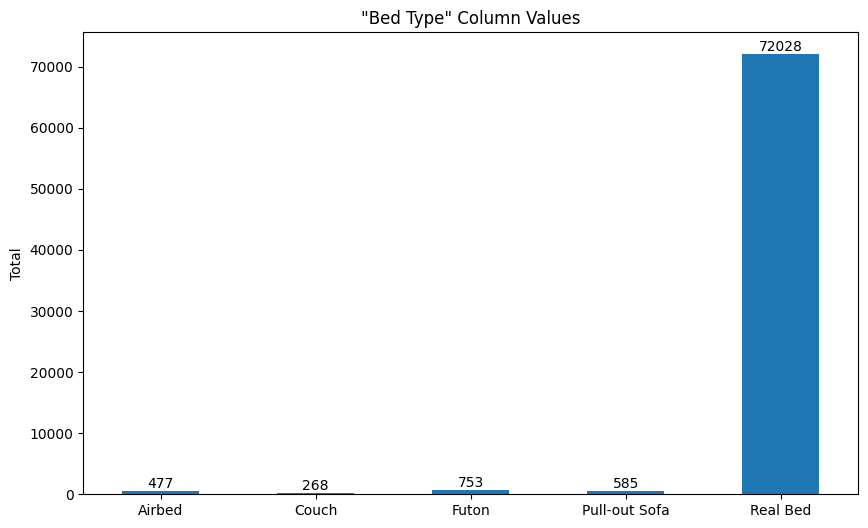

In [16]:
# Get the values
value_counts = df['bed_type'].value_counts()

# Sort the values
value_counts_sorted = value_counts.sort_index()

# Plot the graph
plt.figure(figsize=(10, 6))
bars = value_counts_sorted.plot(kind='bar')

plt.xticks(rotation='horizontal')
plt.xlabel('')
plt.ylabel('Total')
plt.title('"Bed Type" Column Values')

# Add the total count to the top of each column for readability
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{int(bar.get_height())}',
             ha='center', va='bottom')

# Print the graph
plt.show()

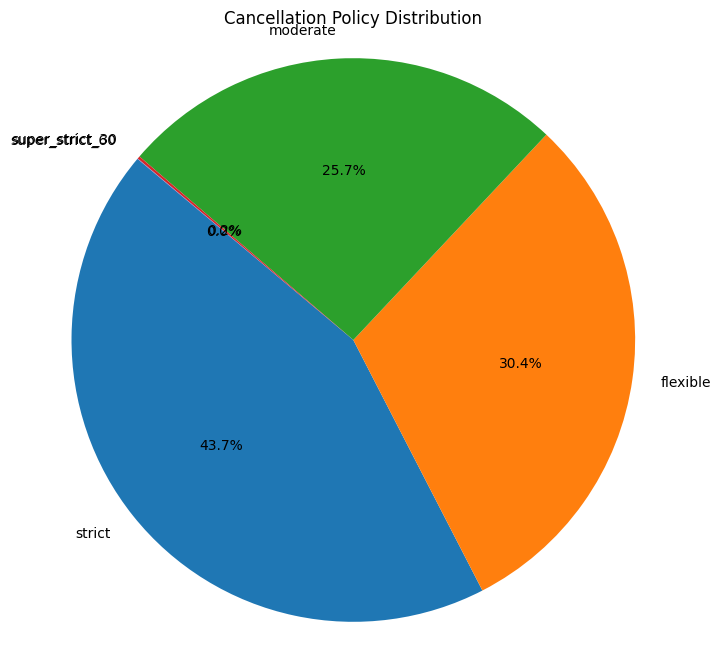

In [17]:
# Get the counts of each unique cancellation policy
policy_counts = df['cancellation_policy'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(policy_counts, labels=policy_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Cancellation Policy Distribution')
plt.axis('equal')
plt.show()


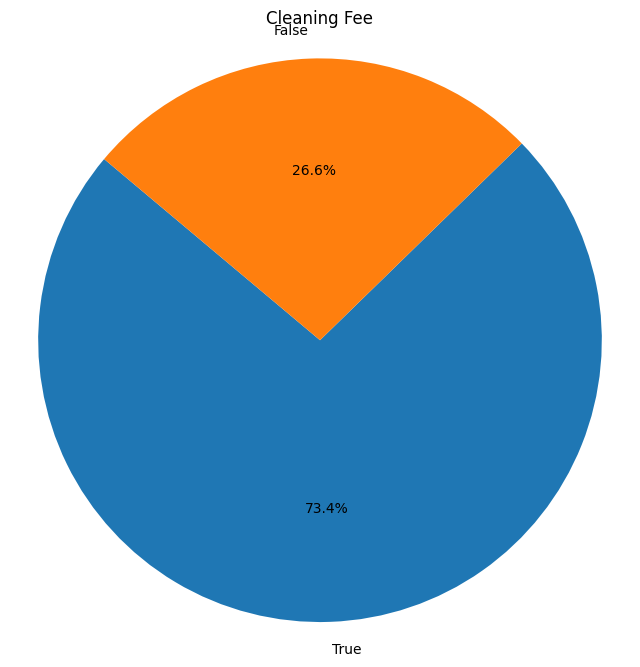

In [18]:
# Get the counts of each unique cleaning fee value
policy_counts = df['cleaning_fee'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(policy_counts, labels=policy_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Cleaning Fee')
plt.axis('equal')
plt.show()


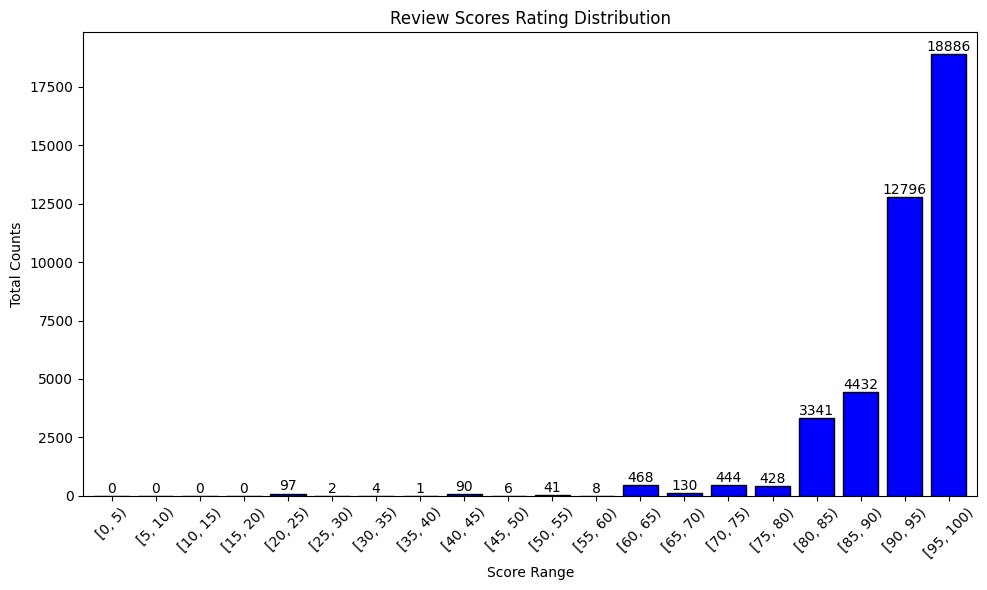

In [22]:
# View the overall review score distribution. I'm sorting scores into groups of 5 to make things easier to visualize.
bins = range(0, 101, 5)

# Categorize the 'review_scores_rating' into bins
df['bucketed_scores'] = pd.cut(df['review_scores_rating'], bins=bins, right=False)

# Count the occurrences in each bin
bucket_counts = df['bucketed_scores'].value_counts().sort_index()

# Plot the chart
plt.figure(figsize=(10, 6))
bars = bucket_counts.plot(kind='bar', width=0.8, color='blue', edgecolor='black')
plt.title('Review Scores Rating Distribution')
plt.xlabel('Score Range')
plt.ylabel('Total Counts')
plt.xticks(rotation=45)
plt.grid(axis='y', which='both', linestyle='--', linewidth=0.5)
plt.gca().yaxis.grid(False)

# Add total counts at the top of each column
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5,
             f'{int(bar.get_height())}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [23]:
# Get the counts of each unique property type
property_type_counts = df['property_type'].value_counts()

# Print the unique property types along with their counts
print("Property type counts:")
for property_type, count in property_type_counts.items():
    print(f"{property_type}: {count}")



Property type counts:
Apartment: 49003
House: 16511
Condominium: 2658
Townhouse: 1692
Loft: 1244
Other: 607
Guesthouse: 498
Bed & Breakfast: 462
Bungalow: 366
Villa: 179
Dorm: 142
Guest suite: 123
Camper/RV: 94
Timeshare: 77
Cabin: 72
In-law: 71
Hostel: 70
Boutique hotel: 69
Boat: 65
Serviced apartment: 21
Tent: 18
Castle: 13
Vacation home: 11
Yurt: 9
Hut: 8
Treehouse: 7
Chalet: 6
Earth House: 4
Tipi: 3
Train: 2
Cave: 2
Casa particular: 1
Parking Space: 1
Lighthouse: 1
Island: 1


# Examining Amenities

Let's see what the most common amenities are, first. Then we'll use one-hot encoding to create individual columns for the most common ones.



In [24]:
# Lookup the most common phrases in the amenities column.

# Isolate all words in the columns
amenities_column = df['amenities']
all_amenities = ' '.join(amenities_column)
words = re.findall(r'\b\w+\b', all_amenities.lower())

# I chose an 'n' value of 2 because larger values didn't return useful phrases.
n = 2
phrases = [' '.join(words[i:i+n]) for i in range(len(words)-n+1)]

# Count the occurrences of each phrase
phrase_counts = Counter(phrases)

# Get the most common phrases
most_common_phrases = phrase_counts.most_common(20)

# Print the most common phrases
print("Most common phrases:")
for phrase, count in most_common_phrases:
    print(f"{phrase}: {count}")


Most common phrases:
wireless internet: 71265
smoke detector: 61727
air conditioning: 55210
internet air: 54335
carbon monoxide: 47190
monoxide detector: 47190
essentials shampoo: 46980
detector carbon: 46664
translation missing: 45718
missing en: 45718
internet wireless: 44217
laptop friendly: 43703
friendly workspace: 43703
hair dryer: 43330
conditioning kitchen: 43281
washer dryer: 42137
hangers hair: 38198
dryer smoke: 37405
family kid: 37026
kid friendly: 37026


In [25]:
# Preprocess text to remove punctuation and special characters
def preprocess_text(text):
    text = re.sub(r'[^\w\s,/]', '', text)
    text = text.lower()
    text = ' '.join(re.findall(r'\b\w+\b', text))
    return text.strip()

# Apply the preprocessing function
df['cleaned_text'] = df['amenities'].apply(preprocess_text)


Ok, I've created my list based off the most common phrases from above. Plus I've added a couple 3 word phrases and single words to the list based off what I saw in the printed dataframe.



1.   3 word phrases - carbon monoxide detector, laptop friendly workspace
2.   1 word phrases - kitchen, washer, dryer, pool, iron



In [26]:
# Tokenize the text column
df['tokens'] = df['cleaned_text'].apply(lambda x: x.split())

# Create a new column with 2 and 3 word phrases from the cleaned text
df['bigrams'] = df['tokens'].apply(lambda x: [' '.join(pair) for pair in zip(x[:-1], x[1:])])
df['trigrams'] = df['tokens'].apply(lambda x: [' '.join(triple) for triple in zip(x[:-2], x[1:-1], x[2:])])

# Flatten the list of bigrams
all_bigrams = [bigram for sublist in df['bigrams'] for bigram in sublist]

# Select specific two-word phrases
selected_phrases = ['wireless internet', 'smoke detector', 'air conditioning', 'carbon monoxide detector', 'smoke detector', 'laptop friendly workspace',
                    'hair dryer', 'kitchen', 'washer', 'dryer', 'kid friendly', 'pool', 'hair dryer', 'iron']


# Create new columns for select two-word phrases
for phrase in selected_phrases:
    df[phrase.replace(' ', '_')] = df['bigrams'].apply(lambda x: 1 if phrase in x else 0)

# Create new columns for select three-word phrases
for phrase in selected_phrases:
    df[phrase.replace(' ', '_')] = df.apply(lambda row: 1 if phrase in row['trigrams'] else row[phrase.replace(' ', '_')], axis=1)

# Create new columns for select one-word phrases
for phrase in selected_phrases:
    df[phrase.replace(' ', '_')] = df.apply(lambda row: 1 if phrase in row['tokens'] else row[phrase.replace(' ', '_')], axis=1)


In [27]:
# Drop unnecessary columns
columns_to_drop = ['cleaned_text', 'tokens', 'bigrams', 'trigrams', 'amenities']
df.drop(columns=columns_to_drop, inplace=True)



In [28]:
# Replace NaN values
df['host_identity_verified'].fillna('NA', inplace=True)
df['host_has_profile_pic'].fillna('NA', inplace=True)
df['instant_bookable'].fillna('NA', inplace=True)

# Convert cleaning fee data type to boolean
df['cleaning_fee'] = df['cleaning_fee'].replace({'TRUE': True, 'FALSE': False})

# Reassign t/f variables
df['host_identity_verified'] = df['host_identity_verified'].map({'t': 1, 'f': 0, 'NA': np.nan}).astype(float).astype('Int64')
df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'t': 1, 'f': 0, 'NA': np.nan}).astype(float).astype('Int64')
df['instant_bookable'] = df['instant_bookable'].map({'t': 1, 'f': 0, 'NA': np.nan}).astype(float).astype('Int64')
df['cleaning_fee'] = df['cleaning_fee'].map({True: 1, False: 0})




In [29]:
# Reorder the columns for readability
cols_order = ['name', 'city', 'neighbourhood', 'zipcode', 'description', 'linear_price', 'property_type', 'room_type', 'accommodates', 'instant_bookable',
        'cancellation_policy', 'cleaning_fee', 'latitude', 'longitude', 'review_scores_rating', 'number_of_reviews', 'last_review',
        'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since', 'bedrooms', 'beds', 'wireless_internet', 'smoke_detector',
        'air_conditioning', 'carbon_monoxide_detector', 'laptop_friendly_workspace', 'hair_dryer', 'kitchen', 'washer', 'dryer', 'kid_friendly',
        'pool', 'iron']

df = df[cols_order]

In [30]:
df.head(1)

,name,city,neighbourhood,zipcode,description,linear_price,property_type,room_type,accommodates,instant_bookable,...,air_conditioning,carbon_monoxide_detector,laptop_friendly_workspace,hair_dryer,kitchen,washer,dryer,kid_friendly,pool,iron
0,Beautiful brownstone 1-bedroom,NYC,Brooklyn Heights,11201,"Beautiful, sunlit brownstone 1-bedroom in the ...",0.074575,Apartment,Entire home/apt,3,0,...,1,0,0,1,1,0,1,1,0,1


In [31]:
# Define the features
features = ['wireless_internet', 'smoke_detector', 'air_conditioning', 'carbon_monoxide_detector',
            'laptop_friendly_workspace', 'hair_dryer', 'kitchen', 'washer', 'dryer', 'kid_friendly',
            'pool', 'iron']

# Get unique city values
unique_cities = df['city'].unique()

# Initialize an empty dictionary to store feature counts for each city
city_feature_counts = {}

# Iterate over each unique city
for city in unique_cities:
    # Filter DataFrame for rows with the current city
    city_listings = df[df['city'] == city]

    feature_counts = {}

    # Iterate over each feature
    for feature in features:
        feature_values = city_listings[feature][city_listings[feature] == 1]
        count = feature_values.count()
        feature_counts[feature] = count

    # Sort the feature counts dictionary by values in descending order
    sorted_counts = dict(sorted(feature_counts.items(), key=lambda item: item[1], reverse=True))

    # Store the sorted counts for the current city in the city_feature_counts dictionary
    city_feature_counts[city] = sorted_counts

# Print the feature counts for each city
for city, counts in city_feature_counts.items():
    print(f"Amenities for Rentals in {city}\n")
    for feature, count in counts.items():
        print(f"{feature}: {count}")
    print("\n")


Amenities for Rentals in NYC

wireless_internet: 31304
kitchen: 30068
air_conditioning: 27159
smoke_detector: 25768
dryer: 22577
carbon_monoxide_detector: 19438
laptop_friendly_workspace: 17637
hair_dryer: 17451
iron: 16552
kid_friendly: 13582
washer: 12375
pool: 361


Amenities for Rentals in SF

wireless_internet: 6214
kitchen: 5589
smoke_detector: 5522
dryer: 5511
carbon_monoxide_detector: 4320
washer: 4285
hair_dryer: 4105
laptop_friendly_workspace: 4017
iron: 3791
kid_friendly: 3093
air_conditioning: 778
pool: 150


Amenities for Rentals in DC

wireless_internet: 5472
air_conditioning: 5407
kitchen: 5275
dryer: 5121
smoke_detector: 5022
washer: 4618
iron: 3637
laptop_friendly_workspace: 3496
kid_friendly: 3491
carbon_monoxide_detector: 3438
hair_dryer: 3359
pool: 405


Amenities for Rentals in LA

wireless_internet: 21351
kitchen: 19918
dryer: 19426
smoke_detector: 18882
washer: 16681
air_conditioning: 15803
carbon_monoxide_detector: 14330
laptop_friendly_workspace: 13605
hair_dry

## Export CSV To Drive

In [ ]:
# Export cleaned CSV to drive
file_path = '/content/drive/My Drive/AirBNBCleaned.csv'
df.to_csv(file_path, index=False)
